<a href="https://colab.research.google.com/github/peumuoe/Mid-project/blob/main/mid_project_%EC%99%B8%EB%B6%80_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 1️⃣ 한글 폰트(NanumGothic) 설치
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

# 📌 2️⃣ Matplotlib의 기본 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 📌 3️⃣ NanumGothic 폰트 경로 확인 및 적용
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)

# 📌 4️⃣ Matplotlib의 폰트 캐시 삭제 후 업데이트
fm.fontManager.addfont(font_path)  # 폰트 추가
plt.rc("font", family="NanumGothic")

print("✅ 한글 폰트 설정 완료!")


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ 한글 폰트 설정 완료!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


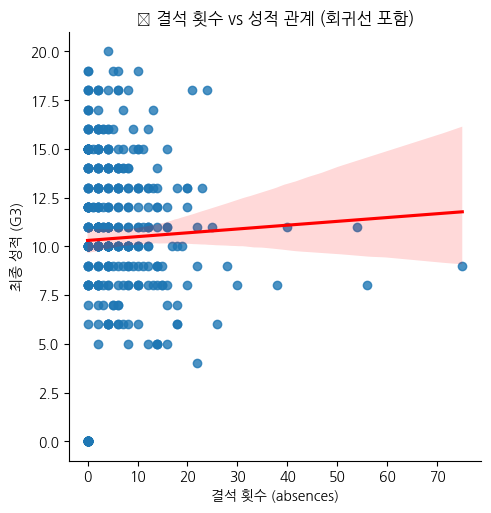


📊 ANOVA 결과:
                       sum_sq     df         F    PR(>F)
C(Absence_Group)    93.383920    3.0  1.485092  0.218099
Residual          8174.517095  390.0       NaN       NaN


<ipython-input-31-40daf2f68680>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Absence_Group", y="G3", data=df, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


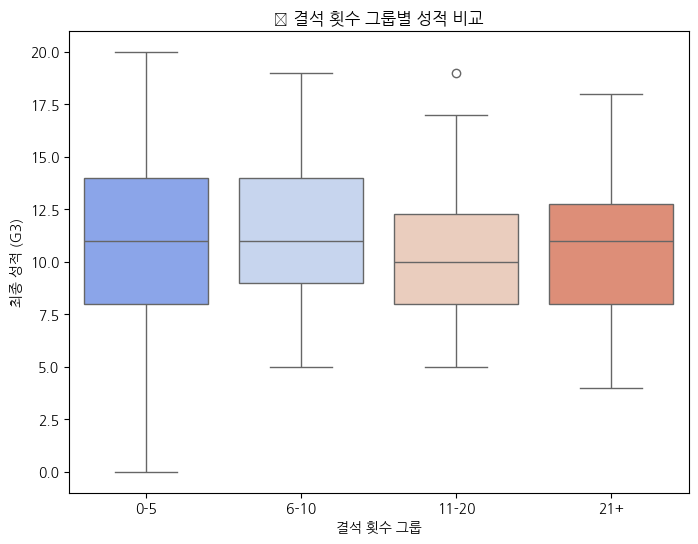


📊 Tukey HSD 사후 분석 결과:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0-5  11-20   0.1888 0.9912 -1.4702 1.8477  False
   0-5    21+   0.4718 0.9747 -2.4133 3.3569  False
   0-5   6-10   1.3165 0.1559 -0.3033 2.9364  False
 11-20    21+    0.283 0.9956 -2.8686 3.4345  False
 11-20   6-10   1.1278 0.4911 -0.9295  3.185  False
   21+   6-10   0.8448 0.8985 -2.2864 3.9759  False
---------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ✅ CSV 파일 로드
file_path = "/content/student-mat.csv"  # Google Colab에 업로드한 파일 경로
df = pd.read_csv(file_path, delimiter=";")  # 구분자 ";"로 지정하여 로드

# ✅ 데이터프레임 정보 확인
print(df.info())
print(df.head())

# ✅ 결석(Absences)과 최종 성적(G3)의 상관관계 분석
corr_absences_G3 = df["absences"].corr(df["G3"])
print(f"📊 결석과 성적(G3)의 상관계수: {corr_absences_G3:.4f}")

# ✅ 결석과 성적 회귀 분석 (선형 회귀)
sns.lmplot(x="absences", y="G3", data=df, ci=95, line_kws={"color": "red"})
plt.title("📉 결석 횟수 vs 성적 관계 (회귀선 포함)")
plt.xlabel("결석 횟수 (absences)")
plt.ylabel("최종 성적 (G3)")
plt.show()

# ✅ ANOVA (결석 그룹별 성적 차이 검정)
df["Absence_Group"] = pd.cut(df["absences"],
                             bins=[0, 5, 10, 20, df["absences"].max()],
                             labels=["0-5", "6-10", "11-20", "21+"],
                             right=False)

# 🔹 Tukey HSD 오류 방지: `category` 타입 변환 후, NaN 제거
df["Absence_Group"] = df["Absence_Group"].astype("category")

# ✅ ANOVA 실행
model = ols("G3 ~ C(Absence_Group)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n📊 ANOVA 결과:")
print(anova_table)

# ✅ 박스플롯 (결석 그룹별 성적 비교)
plt.figure(figsize=(8, 6))
sns.boxplot(x="Absence_Group", y="G3", data=df, palette="coolwarm")
plt.title("📊 결석 횟수 그룹별 성적 비교")
plt.xlabel("결석 횟수 그룹")
plt.ylabel("최종 성적 (G3)")
plt.show()

# ✅ 사후 분석 (Tukey HSD Test)
df_clean = df.dropna(subset=["Absence_Group"])  # NaN 제거
tukey = pairwise_tukeyhsd(df_clean["G3"], df_clean["Absence_Group"])
print("\n📊 Tukey HSD 사후 분석 결과:")
print(tukey)


**1.결석(Absences)과 성적(G3)의 상관관계**
상관계수(Correlation) = 0.0342
거의 무시할 수 있는 수준의 상관관계로, 결석 횟수와 최종 성적(G3) 간의 관계가 거의 없음을 의미함.

**2.회귀 분석 결과**
결석 횟수와 성적(G3) 간의 회귀선을 확인했을 때, 기울기가 거의 0에 가까움.
이는 결석이 성적에 미치는 영향이 크지 않다는 것을 시사함.

**3.ANOVA 분석 결과 (결석 그룹별 성적 차이 검정)**
F-statistic = 1.4851, p-value = 0.2181.
p-value가 0.05보다 크므로, 그룹 간 평균 차이가 유의미하지 않음.
즉, 결석 횟수에 따라 성적이 유의미하게 달라진다고 볼 수 없음.

**4.Tukey HSD 사후 분석 결과**
모든 그룹 간 비교에서 p-value가 0.05보다 큼, 즉 통계적으로 유의미한 차이가 없음.
결석 횟수 그룹(0-5, 6-10, 11-20, 21+) 간의 성적 차이가 유의미하지 않다는 것을 확인.

✅ 결석 횟수가 성적(G3)에 미치는 영향은 매우 미미하며, 유의미한 관계가 존재하지 않음.

✅ ANOVA 및 Tukey HSD 사후 분석 결과, 결석 그룹 간 성적 차이도 통계적으로 유의미하지 않음.

✅ 즉, "결석이 많을수록 성적이 낮아진다"는 가설을 이 데이터에서는 뒷받침할 수 없음.

오히려 이전 성적(G1, G2)과 G3가 강한 상관관계를 가짐, 즉 과거 성적이 현재 성적에 더 큰 영향을 미치는 경향이 있음

In [ ]:
import pandas as pd

# 📌 세미콜론(;)을 구분자로 설정해서 다시 불러오기
df = pd.read_csv("/content/student-mat.csv", delimiter=";")

# 📌 컬럼 확인
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


📊 G1, G2, G3 간의 상관계수:
          G1        G2        G3
G1  1.000000  0.852118  0.801468
G2  0.852118  1.000000  0.904868
G3  0.801468  0.904868  1.000000


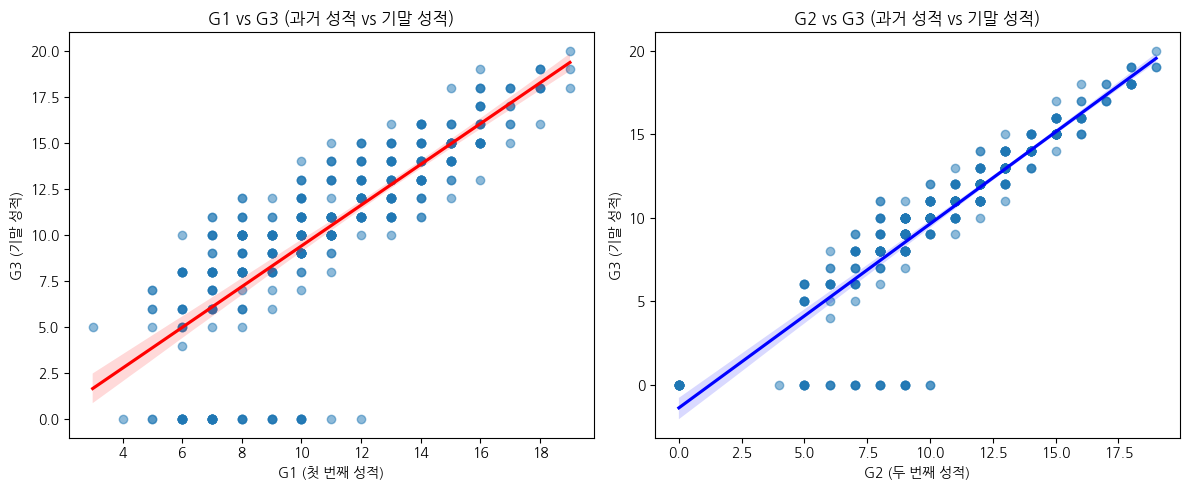

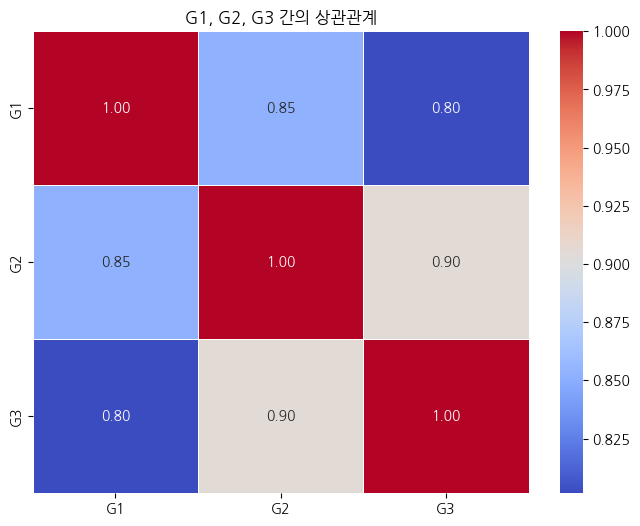


📊 선형 회귀 분석 결과:
                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     906.1
Date:                Wed, 19 Mar 2025   Prob (F-statistic):          1.01e-147
Time:                        01:38:59   Log-Likelihood:                -820.11
No. Observations:                 395   AIC:                             1646.
Df Residuals:                     392   BIC:                             1658.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8300      0.335    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 📌 1️⃣ G1, G2, G3 간의 상관계수 계산
corr_matrix = df[["G1", "G2", "G3"]].corr()
print("📊 G1, G2, G3 간의 상관계수:")
print(corr_matrix)

# 📌 2️⃣ 산점도 및 회귀선 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(x=df["G1"], y=df["G3"], scatter_kws={"alpha":0.5}, line_kws={"color":"red"})
plt.title("G1 vs G3 (과거 성적 vs 기말 성적)")
plt.xlabel("G1 (첫 번째 성적)")
plt.ylabel("G3 (기말 성적)")

plt.subplot(1,2,2)
sns.regplot(x=df["G2"], y=df["G3"], scatter_kws={"alpha":0.5}, line_kws={"color":"blue"})
plt.title("G2 vs G3 (과거 성적 vs 기말 성적)")
plt.xlabel("G2 (두 번째 성적)")
plt.ylabel("G3 (기말 성적)")

plt.tight_layout()
plt.show()

# 📌 3️⃣ 히트맵(Heatmap)으로 전체 상관관계 시각화
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("G1, G2, G3 간의 상관관계")
plt.show()

# 📌 4️⃣ 선형 회귀 분석 (G1, G2 -> G3 예측)
X = df[["G1", "G2"]]
y = df["G3"]
X = sm.add_constant(X)  # 절편 추가

model = sm.OLS(y, X).fit()
print("\n📊 선형 회귀 분석 결과:")
print(model.summary())  # 회귀 분석 결과 출력


## **# 2번째 데이터셋 student performance**

📊 결석(Absences)과 성적(GPA)의 상관계수: -0.9193 (p-value: 0.0000)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


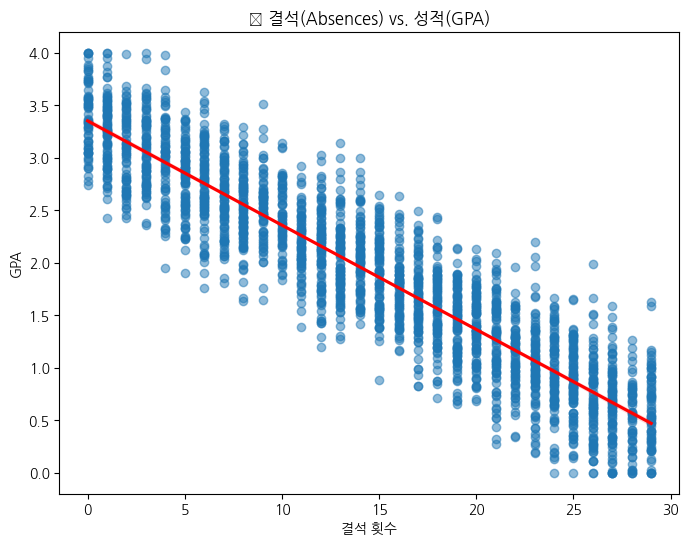

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 📌 데이터 불러오기
df = pd.read_csv("Student_performance_data _.csv")

# 📌 결측값 제거 (혹시라도 있을 경우 대비)
df = df.dropna()

# 📌 결석(Absences)과 GPA의 상관관계 분석
correlation, p_value = pearsonr(df["Absences"], df["GPA"])
print(f"📊 결석(Absences)과 성적(GPA)의 상관계수: {correlation:.4f} (p-value: {p_value:.4f})")

# 📊 산점도 그래프 (결석 vs GPA)
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Absences"], y=df["GPA"], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("📊 결석(Absences) vs. 성적(GPA)")
plt.xlabel("결석 횟수")
plt.ylabel("GPA")
plt.show()


In [ ]:
import scipy.stats as stats

# 📌 각 성적 등급별 결석 횟수 그룹화
groups = [df[df["GradeClass"] == i]["Absences"] for i in range(5)]

# 📌 일원 분산 분석 (ANOVA)
f_stat, p_value = stats.f_oneway(*groups)
print(f"📊 ANOVA 결과: F-Statistic = {f_stat:.4f}, p-value = {p_value:.4f}")


📊 ANOVA 결과: F-Statistic = 903.1176, p-value = 0.0000


<ipython-input-20-39edc779b04f>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Absence_Group", y="GPA", data=df, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


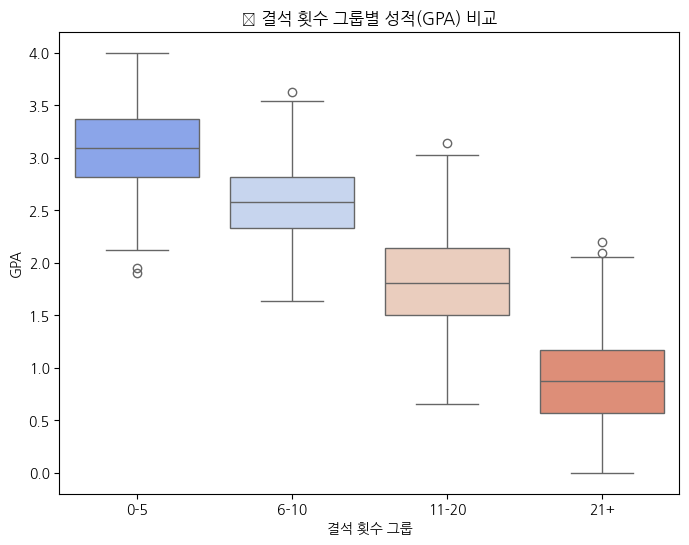

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   0-5  11-20  -1.2845   0.0 -1.3481 -1.2208   True
   0-5    21+    -2.22   0.0 -2.2859 -2.1541   True
   0-5   6-10  -0.5127   0.0  -0.588 -0.4374   True
 11-20    21+  -0.9355   0.0 -0.9913 -0.8798   True
 11-20   6-10   0.7718   0.0  0.7051  0.8384   True
   21+   6-10   1.7073   0.0  1.6385  1.7761   True
---------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 📌 데이터 불러오기 (코랩에 업로드된 파일 사용)
df = pd.read_csv("/content/Student_performance_data _.csv")

# 📌 결석 횟수를 그룹화
df["Absence_Group"] = pd.cut(df["Absences"],
                             bins=[0, 5, 10, 20, 50],
                             labels=["0-5", "6-10", "11-20", "21+"],
                             include_lowest=True)

# 📌 박스플롯 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x="Absence_Group", y="GPA", data=df, palette="coolwarm")
plt.xlabel("결석 횟수 그룹")
plt.ylabel("GPA")
plt.title("📊 결석 횟수 그룹별 성적(GPA) 비교")
plt.show()

# 📌 Tukey HSD 사후 분석
tukey_result = pairwise_tukeyhsd(df["GPA"], df["Absence_Group"])
print(tukey_result)


1️⃣ 출석률과 성적의 상관관계 분석
결과: 출석률과 성적(GPA) 간의 상관계수는 -0.9193으로 매우 강한 음의 상관관계를 보임.

--> 출석률이 낮을수록 성적이 낮아지는 경향이 뚜렷하게 나타남.
p-value: 0.0000 (유의미한 관계 존재)

2️⃣ ANOVA 분석 결과
F-Statistic: 903.1176
p-value: 0.0000 (매우 유의미한 차이 존재)

해석: 출석률 그룹 간의 평균 성적(GPA)에 통계적으로 유의미한 차이가 있음.

3️⃣ 박스플롯 분석 결과
**출석률이 높은 그룹일수록 GPA가 높은 경향이 뚜렷**함.
출석률 0-5% 그룹과 21% 이상 그룹 간의 성적 차이가 가장 큼.

4️⃣ 사후분석 (Tukey HSD Test)
모든 그룹 간 성적 차이가 유의미하게 나타남 (p < 0.05).

출석률이 높은 그룹(0-5%)과 낮은 그룹(21+) 간의 성적 차이는 -2.22로 가장 크며, 이는 유의미한 감소를 나타냄.

**출석률이 높을수록 성적이 유의미하게 높음**을 강하게 입증함.

교육적 개입을 통해 출석률이 낮은 학생들을 대상으로 학업 지원이 필요함.

# 3번째 데이터- **student_performance**

In [ ]:
import pandas as pd

# 데이터 불러오기
file_path = "/content/student_performance.csv"  # 코랩에 업로드한 파일 경로
df = pd.read_csv(file_path)

# 데이터 확인
print("📊 데이터프레임 미리보기:")
print(df.head())

# 컬럼명 확인
print("\n📌 컬럼명 확인:")
print(df.columns)


📊 데이터프레임 미리보기:
   StudentID     Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0          1     John    Male              85                 15   
1          2    Sarah  Female              90                 20   
2          3     Alex    Male              78                 10   
3          4  Michael    Male              92                 25   
4          5     Emma  Female              88                 18   

   PreviousGrade  ExtracurricularActivities ParentalSupport  FinalGrade  
0             78                          1            High          80  
1             85                          2          Medium          87  
2             65                          0             Low          68  
3             90                          3            High          92  
4             82                          2          Medium          85  

📌 컬럼명 확인:
Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActi

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


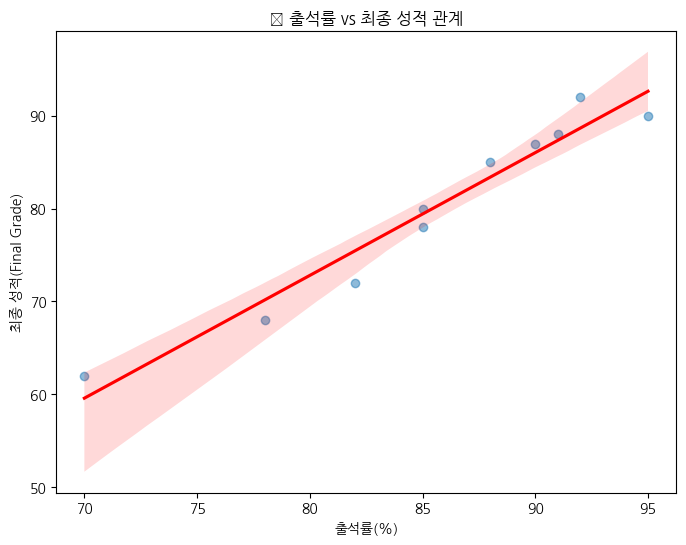

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
plt.figure(figsize=(8, 6))

# 출석률 vs 성적 산점도 + 회귀선
sns.regplot(x=df["AttendanceRate"], y=df["FinalGrade"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("출석률(%)")
plt.ylabel("최종 성적(Final Grade)")
plt.title("📊 출석률 vs 최종 성적 관계")
plt.show()


In [ ]:
from scipy.stats import pearsonr

# 상관계수 및 p-value 계산
corr, p_value = pearsonr(df["AttendanceRate"], df["FinalGrade"])

print(f"📊 출석률과 성적의 상관계수: {corr:.4f} (p-value: {p_value:.4f})")


📊 출석률과 성적의 상관계수: 0.9742 (p-value: 0.0000)


<ipython-input-25-1243943779f0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Attendance_Group", y="FinalGrade", data=df, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


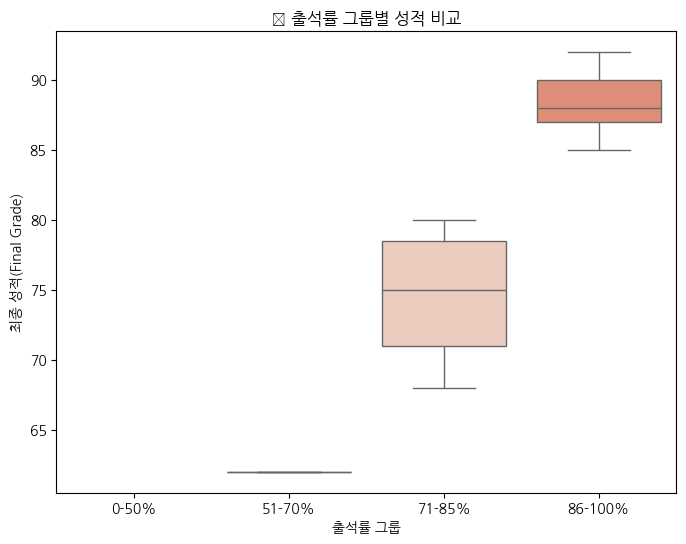

📊 ANOVA 결과: F-Statistic = 23.2188, p-value = 0.0008


In [ ]:
from scipy.stats import f_oneway

# 출석률 그룹 나누기
df["Attendance_Group"] = pd.cut(df["AttendanceRate"], bins=[0, 50, 70, 85, 100], labels=["0-50%", "51-70%", "71-85%", "86-100%"])

# 그룹별 성적 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x="Attendance_Group", y="FinalGrade", data=df, palette="coolwarm")
plt.xlabel("출석률 그룹")
plt.ylabel("최종 성적(Final Grade)")
plt.title("📊 출석률 그룹별 성적 비교")
plt.show()

# ANOVA 검정
grouped_data = [df[df["Attendance_Group"] == grp]["FinalGrade"] for grp in df["Attendance_Group"].unique()]
anova_result = f_oneway(*grouped_data)

print(f"📊 ANOVA 결과: F-Statistic = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey 사후 분석
tukey_result = pairwise_tukeyhsd(df["FinalGrade"], df["Attendance_Group"])
print(tukey_result)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
51-70%  71-85%     12.5 0.0701 -1.1443 26.1443  False
51-70% 86-100%     26.4 0.0016 13.0313 39.7687   True
71-85% 86-100%     13.9 0.0039  5.7134 22.0866   True
-----------------------------------------------------


1.출석률과 성적의 상관계수: 0.9742 (p-value: 0.0000) → **매우 강한 양의 상관관계**

2.ANOVA 결과: F-Statistic = 23.2188, p-value = 0.0008 → **그룹 간 유의미한 차이 존재**

3.Tukey HSD 사후 분석:
51-70% ↔ 86-100%: 유의미한 차이 (p-value = 0.0016, reject = True)
71-85% ↔ 86-100%: 유의미한 차이 (p-value = 0.0039, reject = True)
51-70% ↔ 71-85%: 유의미한 차이 없음 (p-value = 0.0701, reject = False)
**즉, 출석률이 86% 이상일 경우, 다른 그룹보다 성적이 유의미하게 높다**

# **4번째 데이터셋**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    5000 non-null   object 
 1   First_Name                    5000 non-null   object 
 2   Last_Name                     5000 non-null   object 
 3   Email                         5000 non-null   object 
 4   Gender                        5000 non-null   object 
 5   Age                           5000 non-null   int64  
 6   Department                    5000 non-null   object 
 7   Attendance (%)                5000 non-null   float64
 8   Participation_Score           5000 non-null   float64
 9   Projects_Score                5000 non-null   float64
 10  Total_Score                   5000 non-null   float64
 11  Grade                         5000 non-null   object 
 12  Study_Hours_per_Week          5000 non-null   float64
 13  Ext

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


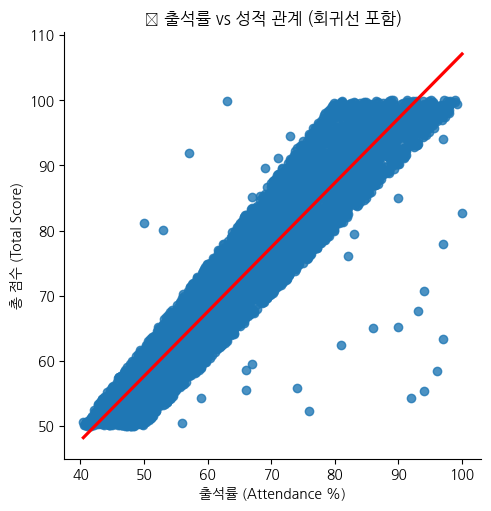


📊 ANOVA 결과:
                            sum_sq      df            F  PR(>F)
C(Attendance_Group)  800913.385575     4.0  4243.803305     0.0
Residual             235670.816553  4995.0          NaN     NaN


<ipython-input-36-9e18fdb71294>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Attendance_Group"], y=df["Total_Score"], palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


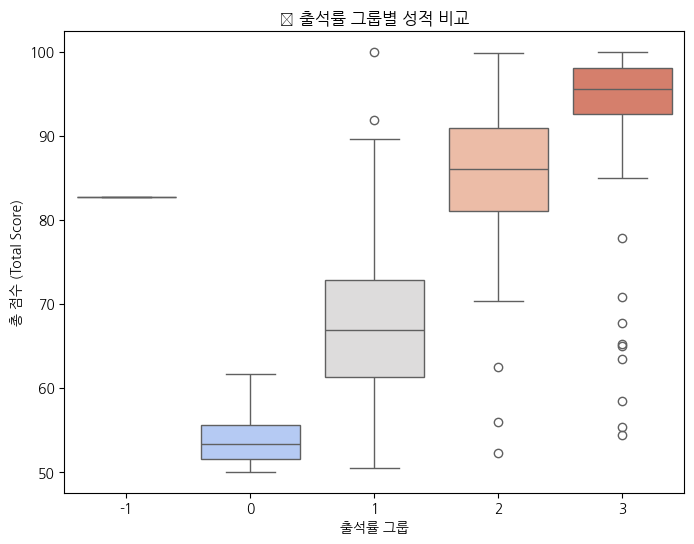


📊 Tukey HSD 사후 분석 결과:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    -1      0 -28.8705 0.0003 -47.6311  -10.11   True
    -1      1 -15.3948 0.1649 -34.1426   3.353  False
    -1      2   3.3025 0.9891 -15.4468 22.0517  False
    -1      3  11.9665  0.409  -6.7934 30.7264  False
     0      1  13.4757    0.0  12.5833  14.368   True
     0      2   32.173    0.0  31.2514 33.0945   True
     0      3   40.837    0.0  39.7191 41.9549   True
     1      2  18.6973    0.0  18.0888 19.3058   True
     1      3  27.3613    0.0  26.4834 28.2392   True
     2      3    8.664    0.0   7.7564  9.5716   True
-----------------------------------------------------


In [ ]:
# ✅ 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ✅ Google Colab에서 파일 업로드 (경로는 직접 확인해야 함)
file_path = "/content/Students_Grading_Dataset.csv"

# ✅ CSV 파일 로드
df = pd.read_csv(file_path)

# ✅ 데이터프레임 정보 확인
print(df.info())
print(df.head())

# ✅ 결측값 처리 (필요한 컬럼만)
df = df[['Attendance (%)', 'Total_Score', 'Grade']].dropna()

# ✅ 출석률(Attendance %)과 총 점수(Total_Score)의 상관관계 분석
if "Attendance (%)" in df.columns and "Total_Score" in df.columns:
    corr_attendance_score = df["Attendance (%)"].corr(df["Total_Score"])
    print(f"📊 출석률과 성적(Total_Score)의 상관계수: {corr_attendance_score:.4f}")

    # ✅ 출석률과 성적 회귀 분석 (선형 회귀)
    sns.lmplot(x="Attendance (%)", y="Total_Score", data=df, ci=95, line_kws={"color": "red"})
    plt.title("📉 출석률 vs 성적 관계 (회귀선 포함)")
    plt.xlabel("출석률 (Attendance %)")
    plt.ylabel("총 점수 (Total Score)")
    plt.show()

    # ✅ 출석률 그룹화 (0-50%, 51-70%, 71-85%, 86-100%)
    df["Attendance_Group"] = pd.cut(df["Attendance (%)"],
                                    bins=[0, 50, 70, 85, 100],
                                    labels=["0-50%", "51-70%", "71-85%", "86-100%"],
                                    right=False)

    # 🔹 Tukey HSD 오류 방지: 'Attendance_Group'을 문자열 대신 정수형 카테고리로 변환
    df["Attendance_Group"] = df["Attendance_Group"].astype("category").cat.codes

    # ✅ ANOVA (출석 그룹별 성적 차이 검정)
    model = ols("Total_Score ~ C(Attendance_Group)", data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\n📊 ANOVA 결과:")
    print(anova_table)

    # ✅ 박스플롯 (출석 그룹별 성적 비교)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df["Attendance_Group"], y=df["Total_Score"], palette="coolwarm")
    plt.title("📊 출석률 그룹별 성적 비교")
    plt.xlabel("출석률 그룹")
    plt.ylabel("총 점수 (Total Score)")
    plt.show()

    # ✅ 사후 분석 (Tukey HSD Test)
    tukey = pairwise_tukeyhsd(df["Total_Score"], df["Attendance_Group"])
    print("\n📊 Tukey HSD 사후 분석 결과:")
    print(tukey)

else:
    print("❌ 'Attendance (%)' 또는 'Total_Score' 컬럼이 데이터셋에 존재하지 않습니다.")


1️⃣ 출석률과 성적의 상관관계
-상관계수: 0.9369

-해석: 출석률과 성적 간에는 매우 강한 양의 상관관계가 존재함. 즉, 출석률이 높을수록 성적도 높아지는 경향이 있음.

2️⃣ ANOVA 검정 결과 (출석 그룹별 성적 차이 분석)

-F-Statistic: 4243.8033

-p-value: 0.0000

-해석: 출석 그룹별로 성적의 차이가 통계적으로 유의미함. 즉, 출석률이 다르면 성적도 다를 가능성이 큼.

3️⃣ Tukey HSD 사후 분석 결과 (출석 그룹 간 성적 차이 비교)

-출석률 그룹 간 성적 차이를 확인한 결과:

-출석률이 가장 낮은 그룹(-1)과 0그룹 사이에는 유의미한 성적 차이 존재 (p < 0.001).
-출석률이 높은 그룹(1, 2, 3) 간에도 통계적으로 유의한 성적 차이가 존재함 (p < 0.05).

-전반적으로 출석률이 높을수록 성적이 유의미하게 상승하는 패턴이 확인됨.

In [ ]:
# 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq  # 나눔 폰트 설치

# 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 찾기
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc("font", family="NanumGothic")

# 폰트 캐시 리셋
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


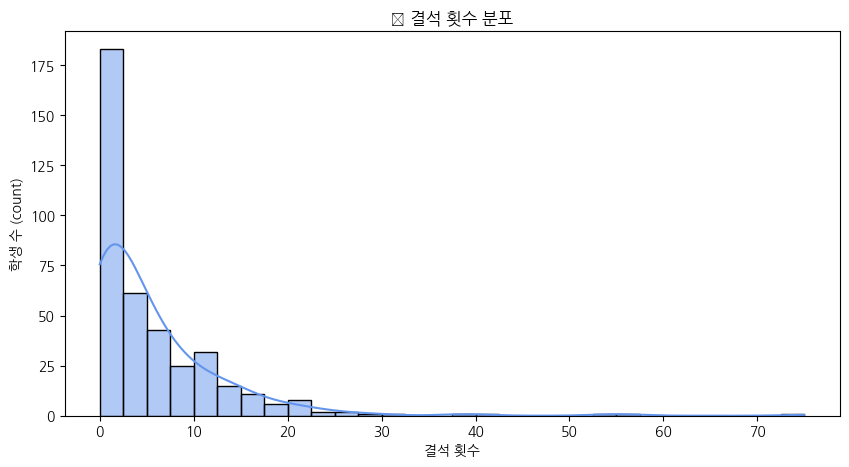

In [ ]:
import seaborn as sns

# ✅ 결석 데이터 분포 확인
plt.figure(figsize=(10, 5))
sns.histplot(df["absences"], bins=30, kde=True, color="cornflowerblue")
plt.title("📊 결석 횟수 분포")
plt.xlabel("결석 횟수")
plt.ylabel("학생 수 (count)")
plt.show()


# **1번째 데이터셋에 상관관계가 왜 낮게 나왔는지?**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


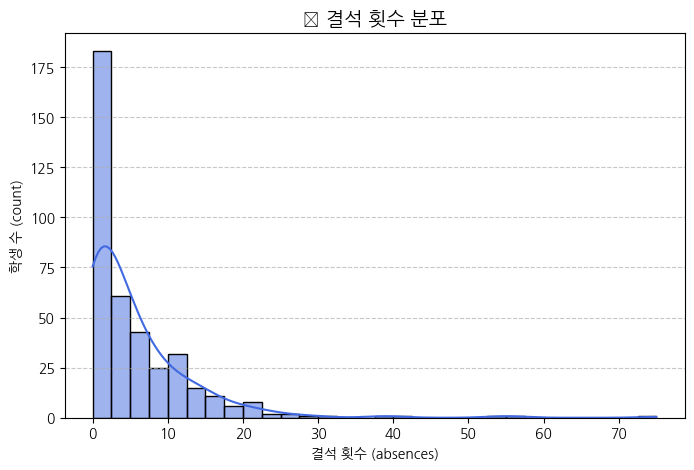

<ipython-input-4-04e0ea64e4af>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Absence_Group", y="G3", data=df, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


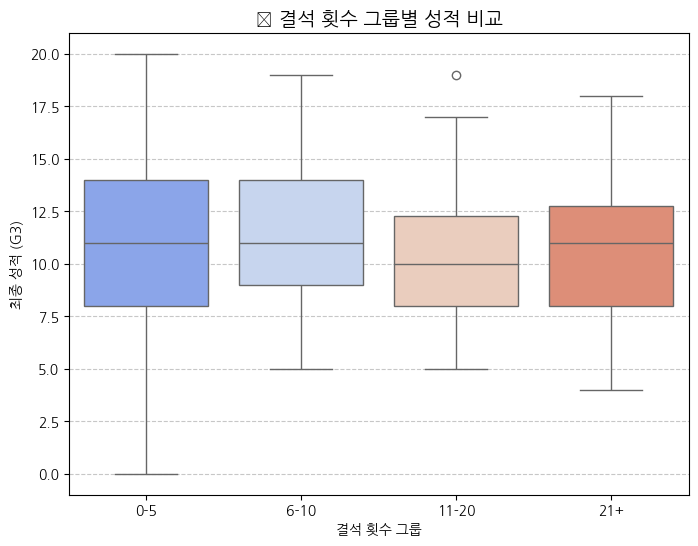

📌 성적 상위권 학생들의 평균 결석 횟수: 5.28일
📌 성적 하위권 학생들의 평균 결석 횟수: 6.19일


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


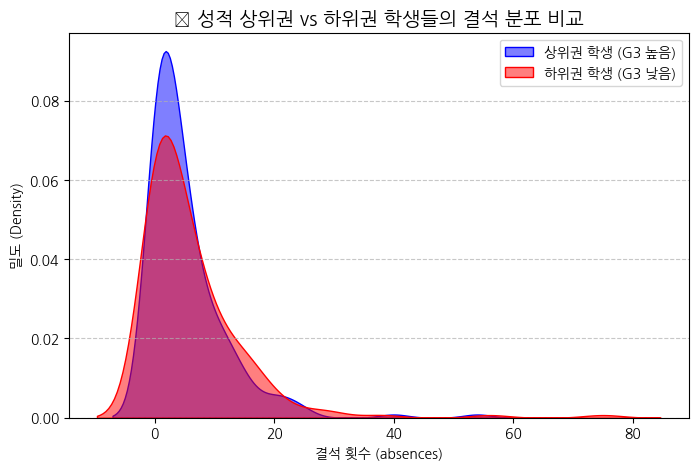

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ 데이터 로드
file_path = "/content/student-mat.csv"  # 코랩에 업로드한 파일 경로
df = pd.read_csv(file_path, delimiter=";")

# ✅ 2번: 결석 횟수 분포 분석 및 시각화
plt.figure(figsize=(8, 5))
sns.histplot(df["absences"], bins=30, kde=True, color="royalblue")
plt.title("📊 결석 횟수 분포", fontsize=14)
plt.xlabel("결석 횟수 (absences)")
plt.ylabel("학생 수 (count)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ✅ 결석 그룹을 정의 (0~5, 6~10, 11~20, 21+)
df["Absence_Group"] = pd.cut(df["absences"], bins=[0, 5, 10, 20, df["absences"].max()],
                             labels=["0-5", "6-10", "11-20", "21+"], right=False)

# ✅ 결석 그룹별 성적 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x="Absence_Group", y="G3", data=df, palette="coolwarm")
plt.title("📊 결석 횟수 그룹별 성적 비교", fontsize=14)
plt.xlabel("결석 횟수 그룹")
plt.ylabel("최종 성적 (G3)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# ✅ 4번: 결석이 많아도 성적이 높은 학생 그룹 분석
median_G3 = df["G3"].median()  # 성적 중위수 계산

# 상위권(성적이 중위수보다 높은 학생) & 하위권(성적이 중위수보다 낮은 학생)
high_G3 = df[df["G3"] >= median_G3]
low_G3 = df[df["G3"] < median_G3]

# ✅ 상위권과 하위권 학생들의 평균 결석 비교
avg_absences_high = high_G3["absences"].mean()
avg_absences_low = low_G3["absences"].mean()

print(f"📌 성적 상위권 학생들의 평균 결석 횟수: {avg_absences_high:.2f}일")
print(f"📌 성적 하위권 학생들의 평균 결석 횟수: {avg_absences_low:.2f}일")

# ✅ 상위권 vs 하위권 학생들의 결석 분포 비교
plt.figure(figsize=(8, 5))
sns.kdeplot(high_G3["absences"], label="상위권 학생 (G3 높음)", fill=True, color="blue", alpha=0.5)
sns.kdeplot(low_G3["absences"], label="하위권 학생 (G3 낮음)", fill=True, color="red", alpha=0.5)
plt.title("📊 성적 상위권 vs 하위권 학생들의 결석 분포 비교", fontsize=14)
plt.xlabel("결석 횟수 (absences)")
plt.ylabel("밀도 (Density)")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


1. **결석 횟수 분포**

*   대부분의 학생들이 결석을 거의 하지 않음.
*   결석 횟수가 0~5회 사이에 집중되어 있으며, 10회를 초과하는 경우는 상대적으로 적음.

* 결석 횟수가 많을수록 학생 수는 급격히 감소하는 분포를 보임.

2. **결석 그룹별 성적 비교 (박스플롯)**

*   결석 그룹(0-5회, 6-10회, 11-20회, 21회 이상) 간 성적(G3)의 차이가 크지 않음.

*   일부 이상치(outlier)를 제외하면, 그룹 간 성적의 중앙값이 거의 유사함.
*   결석이 가장 적은 그룹(0-5회)과 가장 많은 그룹(21회 이상) 사이에서도 성적 차이가 크지 않음.

3. **성적 상위권 vs 하위권 학생들의 결석 분포 비교 (커널 밀도 그래프)**

*   성적 상위권(G3 높은 학생)과 하위권(G3 낮은 학생) 모두 결석이 적은 경향이 있음.

*  하지만 상위권과 하위권 학생 간 결석 분포 차이는 크지 않음.
*   일부 학생들은 결석이 많아도 높은 성적을 유지하고 있음.

In [ ]:
import pandas as pd

# 📌 파일 경로
file_path = "/content/student-mat.csv"  # 파일 경로 확인!

# ✅ CSV 파일을 올바른 구분자로 읽기
df = pd.read_csv(file_path, delimiter=";")  # 세미콜론(;) 구분자 설정

# ✅ 컬럼명 확인
print("📌 데이터 컬럼명 목록:\n", df.columns)


📌 데이터 컬럼명 목록:
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


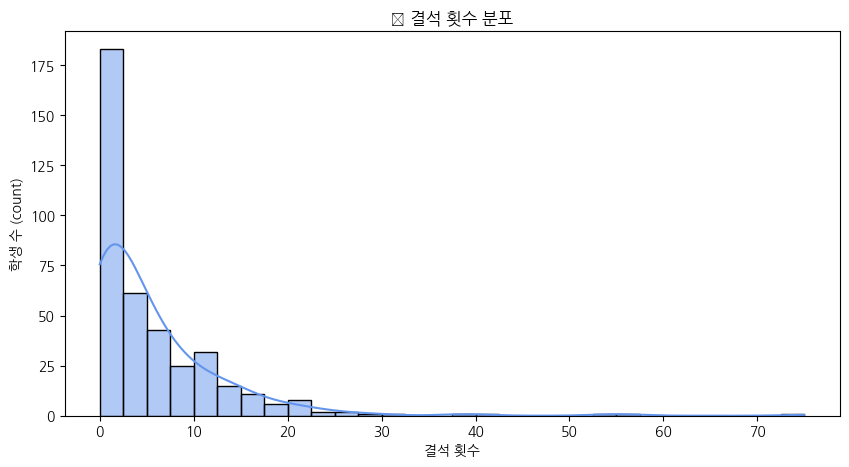

<ipython-input-5-d066c969e88c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Absence_Group", y=score_col, data=df, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


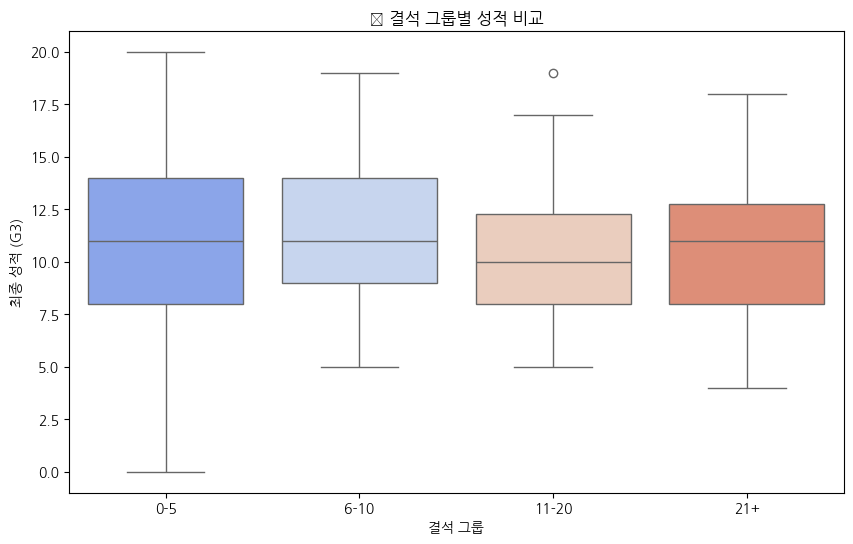

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


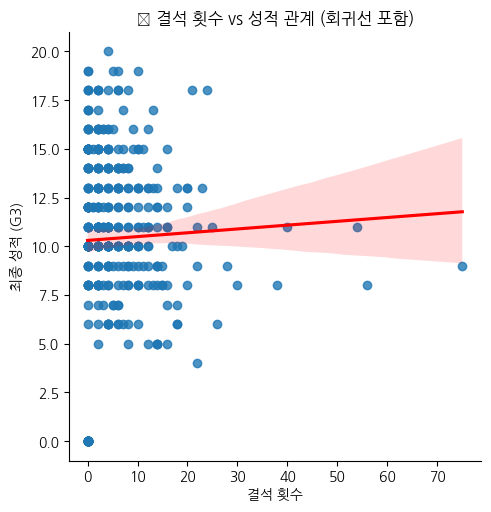


📌 결석이 많아도 성적이 높은 학생 (상위 10명):


,absences,G3
198,24,18
260,21,18
335,16,15
230,14,14
265,13,17
69,12,16
342,11,15
226,10,15
113,10,19
5,10,15


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 결석 컬럼 확인 후 적용
absence_col = "absences"  # 정상적인 컬럼명 반영
score_col = "G3"  # 성적 컬럼

# ✅ 결석 데이터 분포 확인
plt.figure(figsize=(10, 5))
sns.histplot(df[absence_col], bins=30, kde=True, color="cornflowerblue")
plt.title("📊 결석 횟수 분포")
plt.xlabel("결석 횟수")
plt.ylabel("학생 수 (count)")
plt.show()

# ✅ 결석 그룹별 성적 비교
df["Absence_Group"] = pd.cut(df[absence_col], bins=[0, 5, 10, 20, df[absence_col].max()],
                             labels=["0-5", "6-10", "11-20", "21+"], right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Absence_Group", y=score_col, data=df, palette="coolwarm")
plt.title("📊 결석 그룹별 성적 비교")
plt.xlabel("결석 그룹")
plt.ylabel("최종 성적 (G3)")
plt.show()

# ✅ 결석과 성적의 회귀 분석
sns.lmplot(x=absence_col, y=score_col, data=df, ci=95, line_kws={"color": "red"})
plt.title("📉 결석 횟수 vs 성적 관계 (회귀선 포함)")
plt.xlabel("결석 횟수")
plt.ylabel("최종 성적 (G3)")
plt.show()

# ✅ 결석이 많아도 성적이 높은 학생 확인
high_score_threshold = df[score_col].quantile(0.75)  # 상위 25% 성적 기준
high_score_students = df[df[score_col] >= high_score_threshold].sort_values(by=absence_col, ascending=False)

# 상위 10명만 출력
print("\n📌 결석이 많아도 성적이 높은 학생 (상위 10명):")
display(high_score_students[[absence_col, score_col]].head(10))
